# Goals
*   Learn to implement $f_{w,b}$ for linear regression with one variable
*   Learn to implement and explore the `cost` function for linear reggison with one variable
* Learn how to automate the process of optimizing $w$ and $b$ using gradient descent.





We will use the motivating example of housing price prediction.
For the sake of the simplicity, only 10 values and 1 feature has been used in this example. The main purpose is to learn the main logic behind the Linear Regression, Cost Function, and Gradient Descent Algorithm.

| Size (1000 sqft)     | Price (1000s of dollars) |
| -------------------| ------------------------ |
| 1.0               | 300                      |
| 2.0               | 500                      |
| 3.0               | 700                      |
| 4.0               | 900                      |
| 5.0               | 1100                     |
| 6.0               | 1300                     |
| 7.0               | 1500                     |
| 8.0               | 1700                     |
| 9.0               | 1900                     |
| 10.0              | 2100                     |

# Section 1 - Model Representation

In [19]:
import numpy as np
import math
import matplotlib.pyplot as plt

x_train = [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
y_train = [ 300.  500.  700.  900. 1100. 1300. 1500. 1700. 1900. 2100.]
x_train.shape: (10,)
Number of training examples is: 10


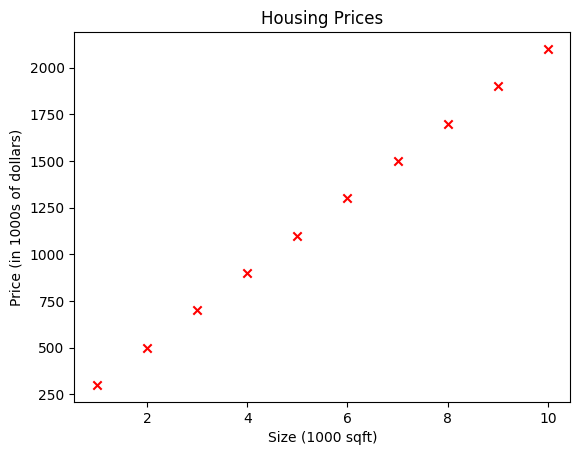

In [20]:
x_train = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])
y_train = np.array([300.0, 500.0, 700.0, 900.0, 1100.0, 1300.0, 1500.0, 1700.0, 1900.0, 2100.0])

print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.show()

the model function for linear regression (which is a function that maps from `x` to `y`) is represented as

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

The formula above is how you can represent straight lines - different values of $w$ and $b$ give you different straight lines on the plot. <br/> <br/>

Let's try to get a better intuition for this through the code blocks below. Let's start with $w = 100$ and $b = 100$.

In [21]:
w = 100
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 100
b: 100


Now, let's compute the value of $f_{w,b}(x^{(i)})$ for your two data points. You can explicitly write this out for each data point as -

for $x^{(0)}$, `f_wb = w * x[0] + b`

for $x^{(1)}$, `f_wb = w * x[1] + b`

For a large number of data points, this can get unwieldy and repetitive. So instead, you can calculate the function output in a `for` loop as shown in the `compute_model_output` function below.

In [22]:
def compute_model_output(x, w, b):
  """
  Computes the prediction of a linear model
  Args:
  x (ndarray (m,)): Data, m examples
  w,b (scalar)    : model parameters
  Returns
  f_wb (ndarray (m,)): model prediction
  """
  m = x.shape[0]
  f_wb = np.zeros(m)

  for i in range(m):
    f_wb[i] = w * x[i] + b

  return f_wb

Now let's call the `compute_model_output` function and plot the output..

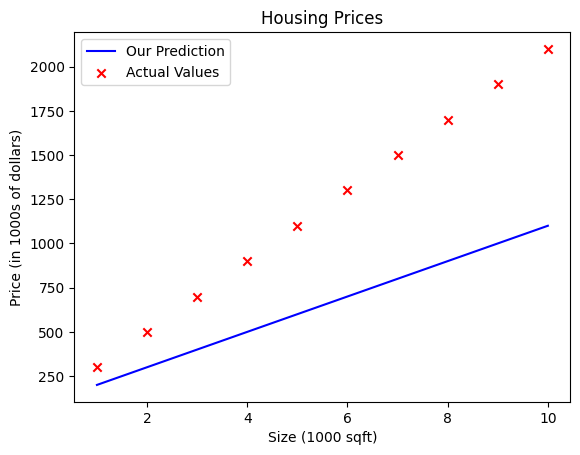

In [23]:
tmp_f_wb = compute_model_output(x_train, w, b)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b', label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()


As you can see, setting $w = 100$ and $b = 100$ does *not* result in a line that fits our data. In the Gradient Descent section, we will see how to improve the model automatically by changing the $w$ and $b$


# Calculating the Cost Function

Cost is a measure how well our model is predicting the target price of the house.
The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$

where
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$. <br> <br> <br>
The code below calculates cost by looping over each example

In [24]:
def compute_cost(x, y, w, b):
  """
  Computes the cost function for linear regression.

  Args:
    x (ndarray (m,)): Data, m examples
    y (ndarray (m,)): target values
    w,b (scalar)    : model parameters

  Returns
    total_cost (float): The cost of using w,b as the parameters for linear regression
    to fit the data points in x and y
  """

  # number of training examples
  m = x.shape[0]

  cost_sum = 0

  for i in range(m):
    f_wb = w * x[i] + b
    cost = (f_wb - y[i]) ** 2
    cost_sum += cost

  total_cost = (1 / (2 *m)) * cost_sum

  return total_cost

In [25]:
# Let's run the function to calculate the current cost
# (Based on the current values of w and b, cost will be very high, we will take care of it later)
temp_cost = compute_cost(x_train, y_train, w, b)
print(f"temp_cost = {temp_cost}")

temp_cost = 192500.0


# Gradient Descent


*Gradient descent* description:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$


Conventions:
- The naming of python variables containing partial derivatives follows this pattern,$\frac{\partial J(w,b)}{\partial b}$  will be `dj_db`.
- w.r.t is With Respect To, as in partial derivative of $J(wb)$ With Respect To $b$.

<br>`compute_gradient`  implements (4) and (5) above and returns $\frac{\partial J(w,b)}{\partial w}$,$\frac{\partial J(w,b)}{\partial b}$.

In [26]:
def compute_gradient(x, y, w, b):
  """
  Computes the gradient for linear regression
  Args:
    x (ndarray (m,)): Data, m examples
    y (ndarray (m,)): target values
    w,b (scalar)    : model parameters
  Returns
    dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
    dj_db (scalar): The gradient of the cost w.r.t. the parameter b
   """
  # Number of training examples
  m = x.shape[0]
  dj_dw = 0
  dj_db = 0

  for i in range(m):
    f_wb = w * x[i] + b
    dj_dw_i = (f_wb - y[i]) * x[i]
    dj_db_i = f_wb - y[i]
    dj_db += dj_db_i
    dj_dw += dj_dw_i
  dj_dw = dj_dw / m
  dj_db = dj_db / m

  return dj_dw, dj_db

We will create 2 helper functions to help us visualize the derivatives and iterations in a graphic

In [27]:
# draw derivative line
# y = m*(x - x1) + y1
def add_line(dj_dx, x1, y1, d, ax):
    x = np.linspace(x1-d, x1+d,50)
    y = dj_dx*(x - x1) + y1
    ax.scatter(x1, y1, color='#0096ff', s=50)
    ax.plot(x, y, '--', c='#C00000',zorder=10, linewidth = 1)
    xoff = 30 if x1 == 200 else 10
    ax.annotate(r"$\frac{\partial J}{\partial w}$ =%d" % dj_dx, fontsize=14,
                xy=(x1, y1), xycoords='data',
            xytext=(xoff, 10), textcoords='offset points',
            arrowprops=dict(arrowstyle="->"),
            horizontalalignment='left', verticalalignment='top')

In [28]:
def plt_gradients(x_train,y_train, f_compute_cost, f_compute_gradient):
    fig,ax = plt.subplots(figsize=(8,4))

    # Print w vs cost to see minimum
    fix_b = 100
    #w_array = np.linspace(-100, 500, 50)
    w_array = np.linspace(0, 400, 50)
    cost = np.zeros_like(w_array)

    for i in range(len(w_array)):
        tmp_w = w_array[i]
        cost[i] = f_compute_cost(x_train, y_train, tmp_w, fix_b)
    ax.plot(w_array, cost,linewidth=1)
    ax.set_title("Cost vs w, with gradient; b set to 100")
    ax.set_ylabel('Cost')
    ax.set_xlabel('w')

    # plot lines for fixed b=100
    for tmp_w in [100, 200, 300]:
        fix_b = 100
        dj_dw,dj_db = f_compute_gradient(x_train, y_train, tmp_w, fix_b )
        j = f_compute_cost(x_train, y_train, tmp_w, fix_b)
        add_line(dj_dw, tmp_w, j, 30, ax)

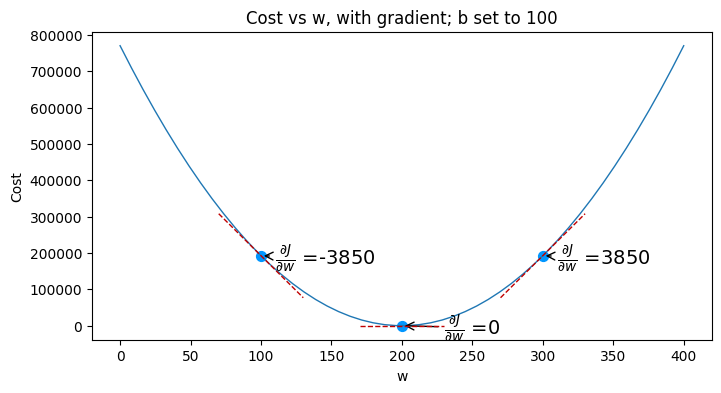

In [29]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

Above, the plot shows $\frac{\partial J(w,b)}{\partial w}$ or the slope of the cost curve relative to $w$ at three points (100, 200, 300), and fixed $b=100$. On the right side of the plot, the derivative is positive, while on the left it is negative. Due to the 'bowl shape', the derivatives will always lead gradient descent toward the bottom where the gradient is zero. <br>
Gradient descent will utilize both $\frac{\partial J(w,b)}{\partial w}$ and $\frac{\partial J(w,b)}{\partial b}$ to update parameters. <br>
Review equation (3) above. The scaled gradient is *subtracted* from the current value of $w$ or $b$. This moves the parameter in a direction that will reduce cost.


---



Now that gradients can be computed,  gradient descent, described in equation (3) above can be implemented below in `gradient_descent`.

In [30]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking
    num_iters gradient steps with learning rate alpha

    Args:
      x (ndarray (m,))  : Data, m examples
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient

    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b]
      """
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in

    for i in range(num_iters):
      # Calcualte the gradient descent and update parameters using gradient_function
      dj_dw, dj_db = gradient_function(x, y, w, b)

      # Update Paramters using equation (3)
      b = b - alpha * dj_db
      w = w - alpha * dj_dw

      # Save cost J at each iteration
      if i < 100000:  # Prevent resrouce exhaustation
        J_history.append(cost_function(x, y, w,b))
        p_history.append([w, b])

      # Print cost every at intervals 10 timer or as many iterations if < 10
      if i% math.ceil(num_iters/10) == 0:
        print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
              f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
              f"w: {w: 0.3e}, b: {b: 0.5e}")

    return w, b, J_history, p_history



In [31]:
# initialize parameters
w_init = 0
b_init = 0

# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-3

# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)

print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 8.17e+05  dj_dw: -8.250e+03, dj_db: -1.200e+03   w:  8.250e+00, b:  1.20000e+00
Iteration 1000: Cost 3.43e+02  dj_dw:  1.707e+00, dj_db: -1.189e+01   w:  2.081e+02, b:  4.34078e+01
Iteration 2000: Cost 2.25e+02  dj_dw:  1.384e+00, dj_db: -9.634e+00   w:  2.066e+02, b:  5.41272e+01
Iteration 3000: Cost 1.48e+02  dj_dw:  1.122e+00, dj_db: -7.809e+00   w:  2.053e+02, b:  6.28162e+01
Iteration 4000: Cost 9.73e+01  dj_dw:  9.093e-01, dj_db: -6.330e+00   w:  2.043e+02, b:  6.98594e+01
Iteration 5000: Cost 6.40e+01  dj_dw:  7.370e-01, dj_db: -5.131e+00   w:  2.035e+02, b:  7.55685e+01
Iteration 6000: Cost 4.20e+01  dj_dw:  5.974e-01, dj_db: -4.159e+00   w:  2.028e+02, b:  8.01962e+01
Iteration 7000: Cost 2.76e+01  dj_dw:  4.843e-01, dj_db: -3.371e+00   w:  2.023e+02, b:  8.39473e+01
Iteration 8000: Cost 1.81e+01  dj_dw:  3.925e-01, dj_db: -2.733e+00   w:  2.019e+02, b:  8.69879e+01
Iteration 9000: Cost 1.19e+01  dj_dw:  3.182e-01, dj_db: -2.215e+00   w:  2.015e+02, b:  8.

### Cost Versus Iterations of Gradient Descent
A plot of cost versus iterations is a useful measure of progress in gradient descent. Cost should always decrease in successful runs. The change in cost is so rapid initially, it is useful to plot the initial decent on a different scale than the final descent. In the plots below, note the scale of cost on the axes and the iteration step.

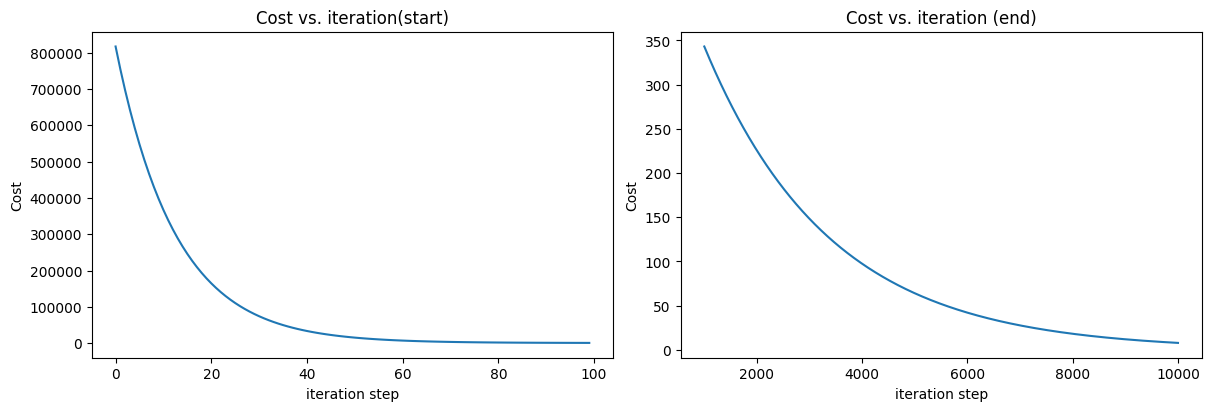

In [32]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
#ax2.plot(J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()

Take a moment and note some characteristics of the gradient descent process printed above.  

- The cost starts large and rapidly declines
- The partial derivatives, `dj_dw`, and `dj_db` also get smaller, rapidly at first and then more slowly. As the process nears the 'bottom of the bowl' progress is slower due to the smaller value of the derivative at that point.
- Progress slows though the learning rate, alpha, remains fixed

### Predictions
Now that we have discovered the optimal values for the parameters $w$ and $b$, we can now use the model to predict housing values based on our learned parameters. As expected, the predicted values are nearly the same as the training values for the same housing. Further, the value not in the prediction is in line with the expected value.

In [33]:
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")
print(f"20000 sqft house prediction {w_final*20.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 292.7 Thousand dollars
1200 sqft house prediction 332.9 Thousand dollars
2000 sqft house prediction 493.9 Thousand dollars
20000 sqft house prediction 4116.0 Thousand dollars


### BONUS: Increased Learning Rate

Proper value of the learning rate, $\alpha$ in equation(3) is a crucial step for Machine Learning algorithms. The larger $\alpha$ is, the faster gradient descent will converge to a solution. But, if it is too large, gradient descent will diverge. Above you have an example of a solution which converges nicely.

Let's try increasing the value of  $\alpha$ and see what happens:

In [34]:
# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 100
tmp_alpha = 55.0e-3
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)

Iteration    0: Cost 1.19e+06  dj_dw: -8.250e+03, dj_db: -1.200e+03   w:  4.538e+02, b:  6.60000e+01
Iteration   10: Cost 2.36e+07  dj_dw: -3.670e+04, dj_db: -5.285e+03   w:  1.293e+03, b:  1.94326e+02
Iteration   20: Cost 4.67e+08  dj_dw: -1.632e+05, dj_db: -2.346e+04   w:  5.032e+03, b:  7.38157e+02
Iteration   30: Cost 9.23e+09  dj_dw: -7.261e+05, dj_db: -1.043e+05   w:  2.166e+04, b:  3.13301e+03
Iteration   40: Cost 1.83e+11  dj_dw: -3.229e+06, dj_db: -4.639e+05   w:  9.563e+04, b:  1.37633e+04
Iteration   50: Cost 3.61e+12  dj_dw: -1.436e+07, dj_db: -2.063e+06   w:  4.246e+05, b:  6.10253e+04
Iteration   60: Cost 7.14e+13  dj_dw: -6.389e+07, dj_db: -9.177e+06   w:  1.888e+06, b:  2.71218e+05
Iteration   70: Cost 1.41e+15  dj_dw: -2.841e+08, dj_db: -4.082e+07   w:  8.396e+06, b:  1.20608e+06
Iteration   80: Cost 2.80e+16  dj_dw: -1.264e+09, dj_db: -1.815e+08   w:  3.734e+07, b:  5.36412e+06
Iteration   90: Cost 5.53e+17  dj_dw: -5.621e+09, dj_db: -8.074e+08   w:  1.661e+08, b:  2.

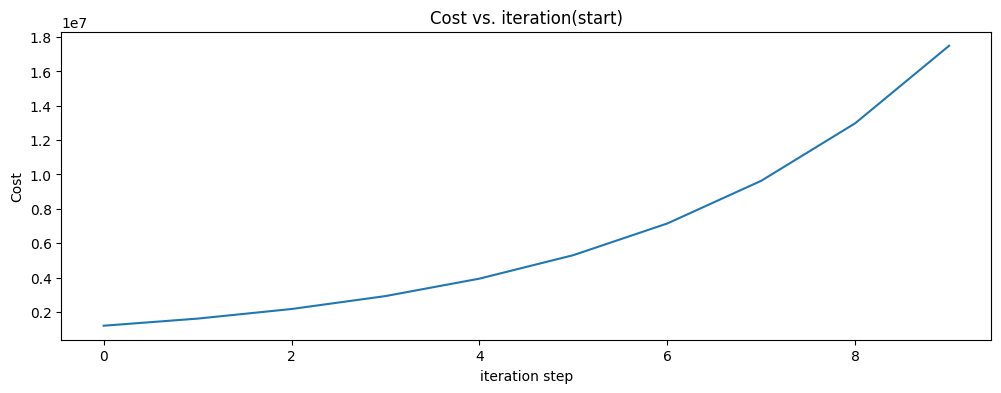

In [35]:
# COST VERSUS ITERATIONS OF GRADIENT DESCENT
# plot cost versus iteration
fig, ax1 = plt.subplots(figsize=(12,4))
ax1.plot(J_hist[:10])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()

As you can see on the graphic above, cost is getting bigger on each iteartion. That means there is a serious problem with our algorithm. This shows that how important to choose the learning rate $\alpha$